<a href="https://colab.research.google.com/github/Nandiniv19/SVM/blob/main/Copy_of_ckplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages and Read the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q keras

In [ ]:
import keras

**Import required libraries and modules**

In [ ]:
import random 
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skimage.feature import hog


from imutils import paths
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 


**Read the Dataset with imutils package**

In [ ]:
from imutils import paths
imagePaths = list(paths.list_images('/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48'))

In [ ]:
imagePaths


['/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sadness/S113_003_00000015.png',
 '/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sadness/S132_002_00000017.png',
 '/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sadness/S064_004_00000013.png',
 '/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sadness/S066_004_00000010.png',
 '/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sadness/S130_009_00000018.png',
 '/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sadness/S501_006_00000041.png',
 '/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sadness/S011_002_00000021.png',
 '/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sadness/S066_004_00000008.png',
 '/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sadness/S095_010_00000014.png',
 '/content/drive/MyDrive/Colab Notebooks/HOG-and-SVM-main/ckplus/CK+48/sa

**Show samples of CK+ dataset**

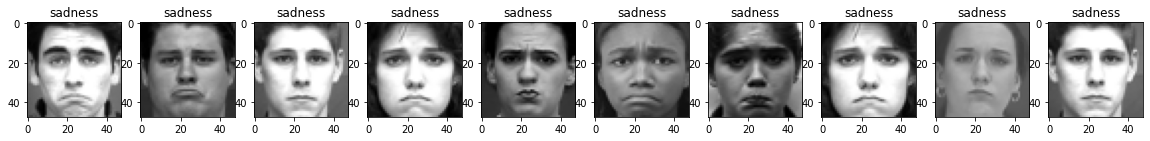

In [ ]:

fig = plt.figure(figsize=(20,20))

for i in range(10):

    fig.add_subplot(1, 10, i + 1)
    plt.imshow(np.array(cv2.imread(imagePaths[i])), cmap='gray')
    label = imagePaths[i].split(os.path.sep)[-2]
    plt.title(label)

plt.show()

# Preprocessing and Feature extraction

**Read and convert images into gray-scale**

In [ ]:
def colortogray(im):
    image = cv2.imread(im)
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return imgray
    


**Resize images with a fixed size(INTER LINEAR interpolation)**

In [ ]:
def resizeImage(image, size):
    # cv2.imshow('Resized', cv2.resize(image, (size,size), interpolation=cv2.INTER_CUBIC))
    return cv2.resize(image, (size,size))


**Features extraction with HOG algorithm**

In [ ]:
def feat_lab(imagePaths):

    features = []
    labels = []

    for imagePath in imagePaths:
        im = colortogray(imagePath)
        im = resizeImage(im,64)
        fd1 =  hog(im, orientations=7, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)

        label = imagePath.split(os.path.sep)[-2]
        labels.append(label)
        features.append(fd1)

    features = np.array(features)
    labels = np.array(labels)
    return features,labels
  


**Compute the features and obtain the lables using the previous functions**

In [ ]:
features,labels = feat_lab(imagePaths)
print("[INFO] The number of features ..." + str(features.shape[1]))
print("[INFO] The number of samples ..." + str(labels.shape[0]))

[INFO] The number of features ...2800
[INFO] The number of samples ...981


# Classification



***The classifier***

In [ ]:
svm_clf = SVC(kernel='rbf', gamma='scale', C= 10)



1.   **Hold-out accuracy**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = classification_report(y_train, pred)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = classification_report(y_test, pred)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

################################################################################
################################################################################

R =random.randint(1,88)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3,random_state=R)

print("[INFO] The number of images used in training ..." + str(X_train.shape[0]))
print("[INFO] The number of images used in testing ..." + str(X_test.shape[0]))


svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

[INFO] The number of images used in training ...686
[INFO] The number of images used in testing ...295
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        93
    contempt       1.00      1.00      1.00        44
     disgust       1.00      1.00      1.00       120
        fear       1.00      1.00      1.00        63
       happy       1.00      1.00      1.00       139
     sadness       1.00      1.00      1.00        57
    surprise       1.00      1.00      1.00       170

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

_______________________________________________
Confusion Matrix: 
 [[ 93   0   0   0   0   0   0]
 [  0  44   0   0   0   0   0]
 [  0   0 120   0   0   0   0]
 [  0   0   0  63   0   0   0]

*2*.   **Cross-validation accuracy**

**3-FOLDS**

In [ ]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')

SVM MEAN  Accuracy:  98.06%
Standard deviation:  0.802%


**5-FOLDS**

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')

SVM MEAN  Accuracy:  99.38%
Standard deviation:  0.749%


**10-FOLDS**

In [ ]:

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')

SVM MEAN  Accuracy:  99.69%
Standard deviation:  0.918%
